# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

# Main workspace generation code

In [2]:
import numpy as np

jointmax = 10
step = 0.5
d = 0.1  # padding
Lmax = 5.5

M = np.matrix([[0, 1, -1], [-1, 1, 1], [1, 1, 1]])
#M = np.identity(3)
# Create meshgrid for l1, l2, l3
l1, l2, l3 = np.meshgrid(np.arange(0, jointmax, step), 
                         np.arange(0, jointmax, step), 
                         np.arange(0, jointmax, step), 
                         indexing='ij')

# Enforce l1 <= l2 and l1 <= l3
valid_indices = (l2 >= l1) & (l3 >= l1)
l1 = l1[valid_indices]
l2 = l2[valid_indices] - d  # Apply padding here
l3 = l3[valid_indices] + d  # Apply padding here

# Vectorized computation of p and joint_pos
# Assuming M is defined and invertible
p = np.linalg.inv(M) @ np.vstack([l1.ravel(), l2.ravel(), l3.ravel()])

# Now, we can calculate distances
joint_pos_1 = np.vstack([np.zeros_like(l1), l1, np.zeros_like(l1)])
joint_pos_2 = np.vstack([np.full_like(l1, d), l2, np.zeros_like(l1)])
joint_pos_3 = np.vstack([np.full_like(l1, -d), l3, np.zeros_like(l1)])

distances_1 = np.linalg.norm(p - joint_pos_1, axis=0)
distances_2 = np.linalg.norm(p - joint_pos_2, axis=0)
distances_3 = np.linalg.norm(p - joint_pos_3, axis=0)

# Assuming Lmax is defined, create the mask where all distances are less than Lmax
mask = (distances_1 < Lmax) & (distances_2 < Lmax) & (distances_3 < Lmax)

# Apply the mask to the p array to filter out the invalid points
p_valid = p[:, mask]

# Extract valid x, y, z coordinates
x_valid, y_valid, z_valid = p_valid

xs = x_valid.tolist()
ys = y_valid.tolist()
zs = z_valid.tolist()


# Workspace plots

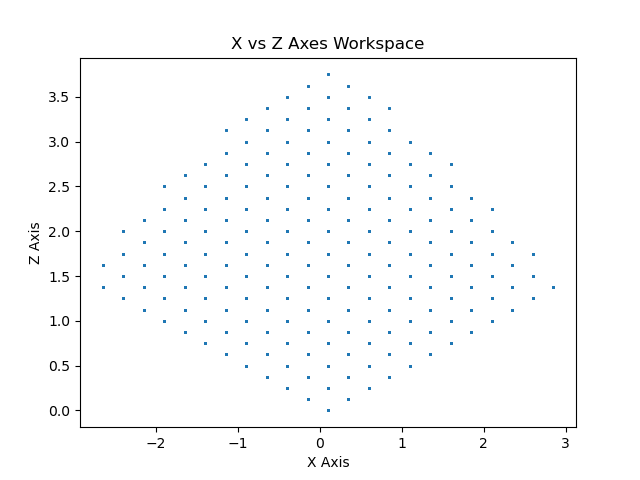

In [3]:
plt.figure()
plt.scatter(xs, zs, s=1)
plt.xlabel("X Axis")
plt.ylabel("Z Axis")
plt.title("X vs Z Axes Workspace")
plt.show()

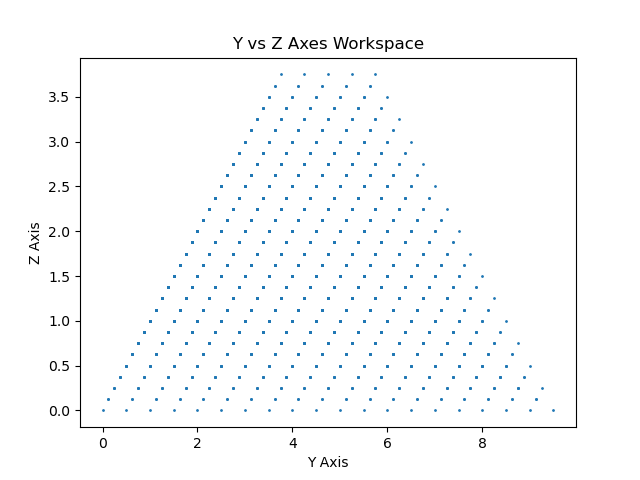

In [4]:
plt.figure()
plt.scatter(ys, zs, s=1)
plt.xlabel("Y Axis")
plt.ylabel("Z Axis")
plt.title("Y vs Z Axes Workspace")
plt.show()

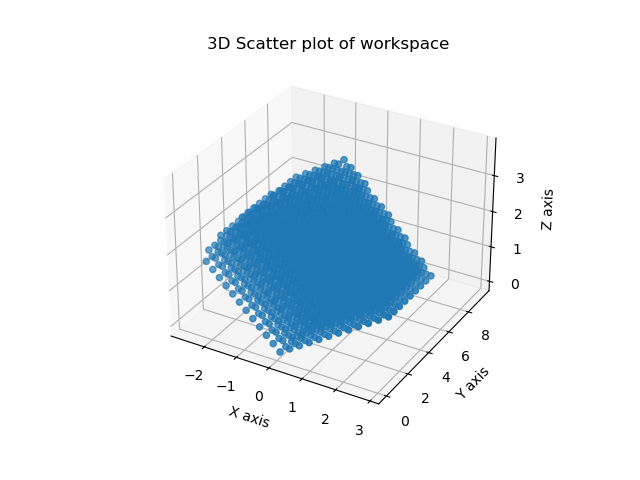

In [5]:
plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.scatter3D(xs, ys, zs, cmap='Greens')
ax.set_title("3D Scatter plot of workspace")
plt.show()

# Fixed L1 Workspace

Redoes the workspace analysis but with L1 joint fixed

In [6]:
l1, l2, l3 = np.meshgrid(np.arange(0, jointmax, step), 
                         np.arange(0, jointmax, step), 
                         np.arange(0, jointmax, step), 
                         indexing='ij')

l1 = 0*l1

# Enforce l1 <= l2 and l1 <= l3
valid_indices = (l2 >= l1) & (l3 >= l1)
l1 = l1[valid_indices]
l2 = l2[valid_indices] - d  # Apply padding here
l3 = l3[valid_indices] + d  # Apply padding here

# Vectorized computation of p and joint_pos
# Assuming M is defined and invertible
p = np.linalg.inv(M) @ np.vstack([l1.ravel(), l2.ravel(), l3.ravel()])

# Now, we can calculate distances
joint_pos_1 = np.vstack([np.zeros_like(l1), l1, np.zeros_like(l1)])
joint_pos_2 = np.vstack([np.full_like(l1, d), l2, np.zeros_like(l1)])
joint_pos_3 = np.vstack([np.full_like(l1, -d), l3, np.zeros_like(l1)])

distances_1 = np.linalg.norm(p - joint_pos_1, axis=0)
distances_2 = np.linalg.norm(p - joint_pos_2, axis=0)
distances_3 = np.linalg.norm(p - joint_pos_3, axis=0)

# Assuming Lmax is defined, create the mask where all distances are less than Lmax
mask = (distances_1 < Lmax) & (distances_2 < Lmax) & (distances_3 < Lmax)

# Apply the mask to the p array to filter out the invalid points
p_valid = p[:, mask]

# Extract valid x, y, z coordinates
x_valid, y_valid, z_valid = p_valid

xs = x_valid.tolist()
ys = y_valid.tolist()
zs = z_valid.tolist()


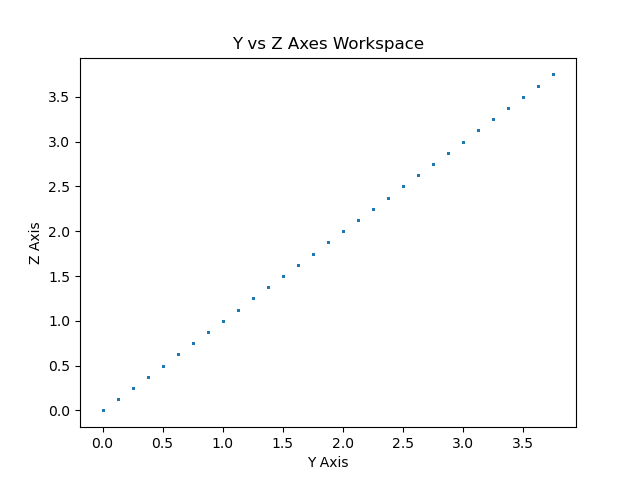

In [7]:
plt.figure()
plt.scatter(ys, zs, s=1)
plt.xlabel("Y Axis")
plt.ylabel("Z Axis")
plt.title("Y vs Z Axes Workspace")
plt.show()

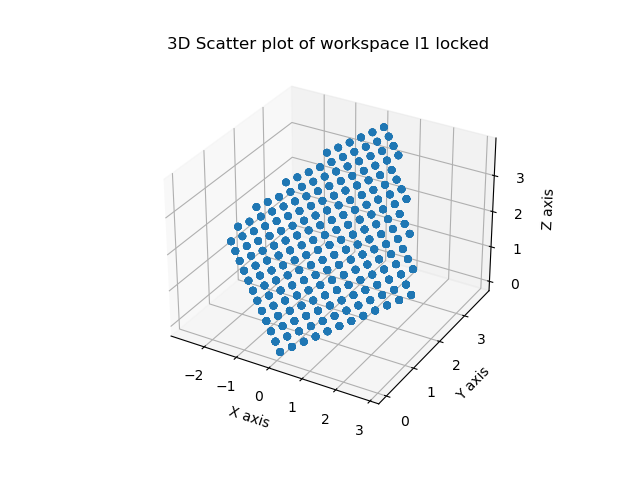

In [8]:
plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.scatter3D(xs, ys, zs, cmap='Greens')
ax.set_title("3D Scatter plot of workspace l1 locked")
plt.show()